# Visualisations


In [6]:
import matplotlib.pyplot as plt 
import pandas as pd

In [7]:
condtion=pd.read_csv('features4/MI.csv',low_memory=False).apply(pd.to_numeric,errors='coerce')
control=pd.read_csv('features4/SR.csv',low_memory=False).iloc[:5000].apply(pd.to_numeric,errors='coerce')

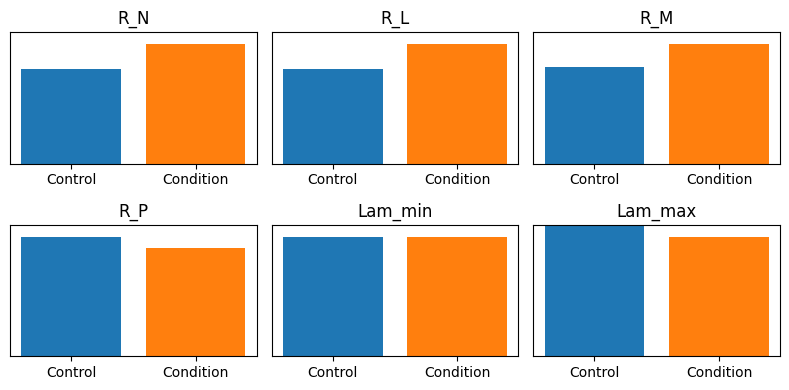

In [8]:
import matplotlib.pyplot as plt

fields = ['R_N', 'R_L', 'R_M', 'R_P', 'Lam_min', 'Lam_max']

controlPlot = [control[f].mean() for f in fields]
conditionPlot = [condtion[f].mean() for f in fields]

# Create a smaller figure size
fig, axes = plt.subplots(2, 3, figsize=(8, 4))

# Define a color scheme
colors = ['#1f77b4', '#ff7f0e']  # Blue for Control, Orange for Condition

for i, field in enumerate(fields):
    ax = axes[i // 3, i % 3]
    ax.bar(['Control', 'Condition'], [controlPlot[i], conditionPlot[i]], color=colors)
    ax.set_title(field)
    ax.set_ylim(0, max(controlPlot[i], conditionPlot[i]) * 1.1)  # Set a uniform y-axis limit
    ax.set_yticks([])  # Remove y-axis labels

plt.tight_layout()
plt.show()


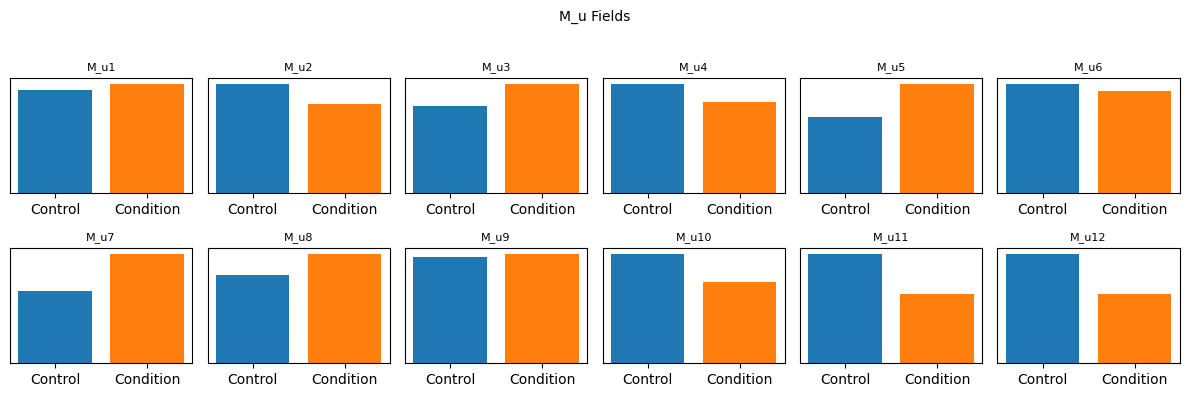

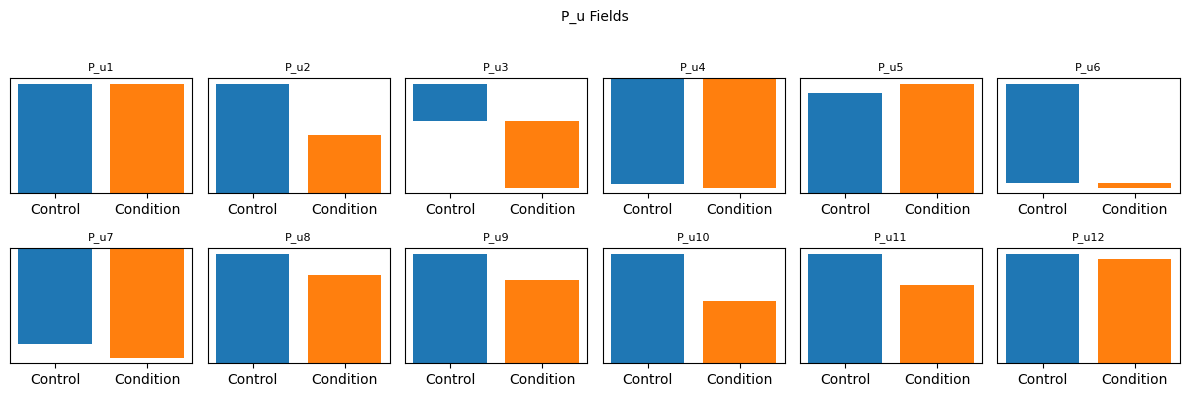

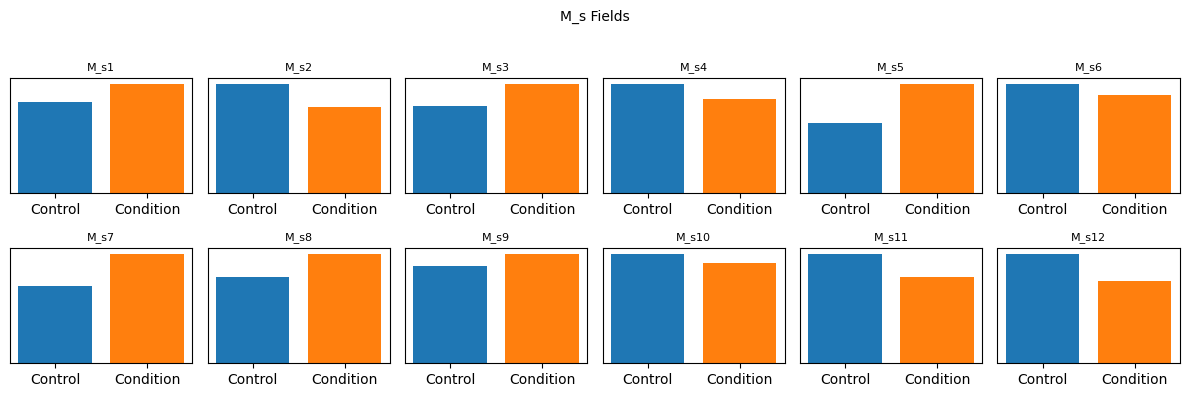

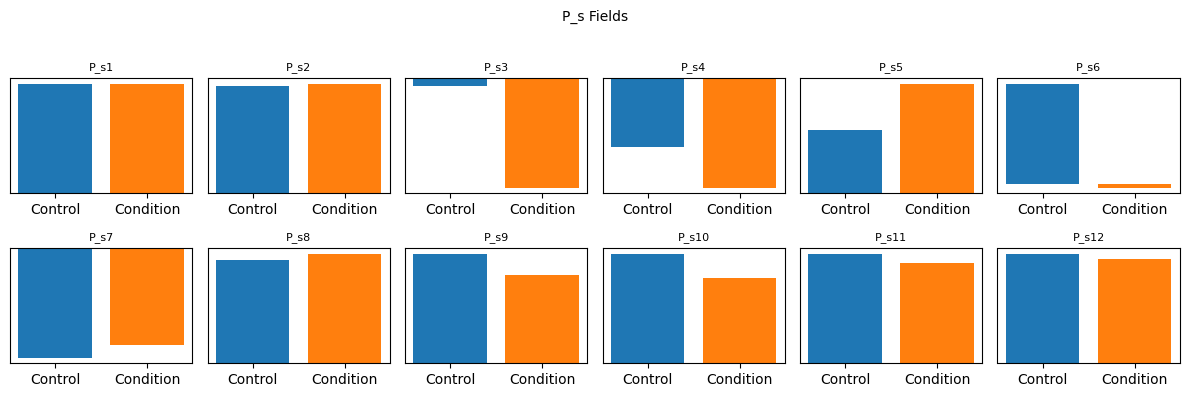

In [9]:
import matplotlib.pyplot as plt

M_u_fields = [f for f in control.columns if f.strip().startswith('M_u')]
P_u_fields = [f for f in control.columns if f.strip().startswith('P_u')]
M_s_fields = [f for f in control.columns if f.strip().startswith('M_s')]
P_s_fields = [f for f in control.columns if f.strip().startswith('P_s')]

# Create a function to plot fields in separate subplots
def plot_fields(fields, title):
    num_plots = len(fields)
    cols = 6
    rows = 2
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4))  # Smaller size for compactness
    
    # Define a color scheme
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Control, Orange for Condition
    
    for i, field in enumerate(fields):
        ax = axes[i // cols, i % cols]
        ax.bar(['Control', 'Condition'], [control[field].mean(), condtion[field].mean()], color=colors)
        ax.set_title(field.strip(), fontsize=8)  # Smaller title font size
        ax.set_yticks([])  # Remove y-axis labels
    
    # Hide any unused subplots
    for j in range(num_plots, rows * cols):
        axes[j // cols, j % cols].axis('off')

    plt.suptitle(title, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

# Plot each category separately
plot_fields(M_u_fields, 'M_u Fields')
plot_fields(P_u_fields, 'P_u Fields')
plot_fields(M_s_fields, 'M_s Fields')
plot_fields(P_s_fields, 'P_s Fields')

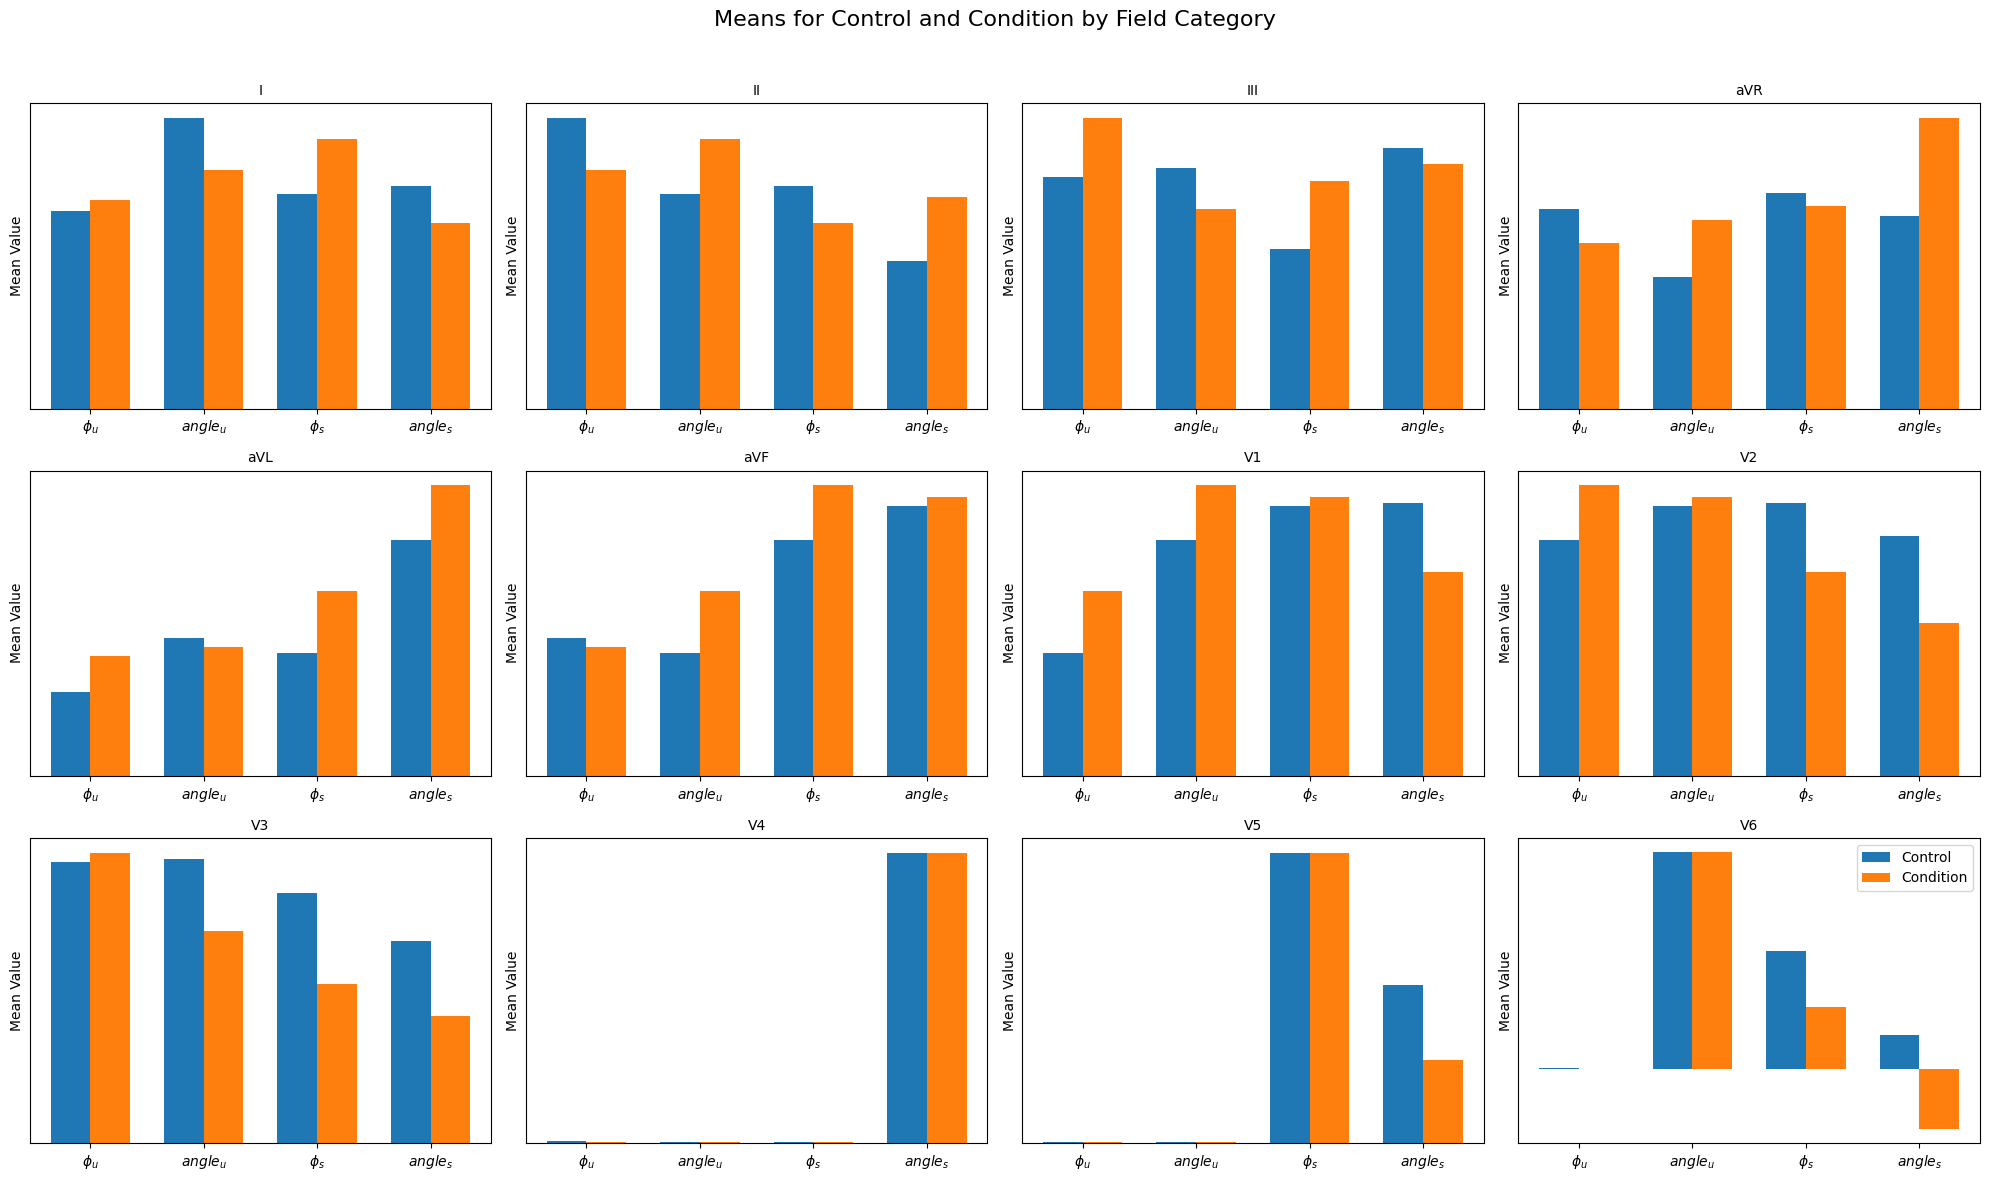

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# Define field categories
M_u_fields = [f for f in control.columns if f.strip().startswith('M_u')]
P_u_fields = [f for f in control.columns if f.strip().startswith('P_u')]
M_s_fields = [f for f in control.columns if f.strip().startswith('M_s')]
P_s_fields = [f for f in control.columns if f.strip().startswith('P_s')]

# Combine fields for means calculation
fields = M_u_fields + P_u_fields + M_s_fields + P_s_fields
names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

# Calculate means for Control and Condition
control_means = [control[field].mean() for field in fields]
condition_means = [condtion[field].mean() for field in fields]

# Set up the subplots (3 rows and 4 columns for 12 plots)
fig, axes = plt.subplots(3, 4, figsize=(20, 12))

axes = axes.flatten()  # Flatten to easily access axes

# Define bar width and colors
bar_width = 0.35
colors = ['#1f77b4', '#ff7f0e']  # Blue for Control, Orange for Condition

# Create plots for each field
for i, ax in enumerate(axes):
    # Set the positions for Control and Condition
    x = np.arange(4)  # Four groups for each field (M_u, P_u, M_s, P_s)
    
    # Determine which field we are plotting
    if i < len(fields):  # Ensure we don't go out of bounds
        control_data = control_means[i:i + 4]  # Control means for the current field
        condition_data = condition_means[i:i + 4]  # Condition means for the current field
        
        # Plot bars
        ax.bar(x - bar_width/2, control_data, bar_width, label='Control', color=colors[0])
        ax.bar(x + bar_width/2, condition_data, bar_width, label='Condition', color=colors[1])
        
        # Set titles and labels
        ax.set_title(names[i], fontsize=10)  # Title for the specific field
        ax.set_xticks(x)
        ax.set_xticklabels(['$ϕ_u$', '$angle_u$', '$ϕ_s$', '$angle_s$'])  # Change this to the relevant labels
        ax.set_ylabel('Mean Value')
        ax.set_yticks([])  # Remove y-axis labels

# Adding overall title and legend
plt.suptitle('Means for Control and Condition by Field Category', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.legend(loc='upper right')
plt.show()
